### __Cross Validation Techniques__

Cross-validation is a machine learning technique that evaluates model performance on unseen data by dividing the data into multiple folds. In each iteration, one fold is used as a validation set and the remaining as training data. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. Some of the common cross-validation techniques are:





**1. K-Fold Cross-Validation**

In K-Fold Cross validation, the dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.
* Pros: Provides a more accurate estimate of model performance.
* Cons: Computationally intensive for large datasets.



**2. Stratified K-Fold Cross-Validation**

Similar to K-Fold but ensures that each fold has the same proportion of different classes as the original dataset. This is especially useful for imbalanced datasets.
* Pros: More reliable performance estimates for imbalanced datasets.
* Cons: Still computationally intensive.



**3. Holdout Method**

In holdout method, the dataset is divided into two sets, a training set and a test set. The model is trained on the training set and evaluated on the test set.

* Pros: Simple and fast.
* Cons: The evaluation may be noisy due to the variability in the training/test split.


**4. Leave-One-Out Cross-Validation (LOOCV)**

A special case of k-fold cross-validation where k is equal to the number of data points in the dataset. Each observation is used once as a test set, and the model is trained on all remaining data points.
* Pros: Maximizes the amount of training data used.
* Cons: Extremely computationally expensive, especially for large datasets.

**Now, let's build a linear regression model, perform analysis on it, and evaluate the model's performance:**

#### Step 1: Set up and Data Loading
- Import the necessary libraries: numpy, pandas, matplotlib.pyplot from sklearn.datasets.
- Load the housing dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


#### Step 2: Initial Data Exploration
- Explore the first few rows, get data type info, generate statistical summaries, and check for missing values using __.head()__, __info()__,  __.describe()__, and __.isna().sum()__.

In [2]:
# Load the dataset
housing_data = pd.read_csv('../dataset/housing_with_ocean_proximity.csv')

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Display summary statistics for the DataFrame 'housing_df'
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


__Observations:__
- The house price lies mostly in the price bracket between 1.1 million and 2.6 million.
-  Most houses are 18 to 37 years old.


In [6]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Note that `total_bedrooms` is the only feature with **207** null values.
- Since the null values makes up only 1% of the total data, we can quickly and safely remove them.
- `ocean_proximity` is a categorial variable for which we need to create dummy variables

In [7]:
# Remove all the rows with null values:
housing_data = housing_data.dropna()

In [8]:
# Recheck for missing values in the DataFrame 'housing_df'
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Let's create dummy variables for ocean_proximity

- `housing_data`: This is the DataFrame containing your housing data.

- `pd.get_dummies`: This is the pandas function that performs the one-hot encoding. It converts categorical variables into a series of binary variables (0 or 1). Each category in the original variable is represented by a separate column.


- `drop_first=True`: This parameter drops the first category for each variable. This is done to avoid the dummy variable trap, which is a situation where the dummy variables are highly collinear, causing issues in statistical models. By dropping the first category, you can reduce multicollinearity.

- `dtype='int'`: This ensures that the resulting dummy variables are of integer type (0 or 1), which can save memory compared to the default float type.

- `prefix='op'`: This parameter adds a prefix to the new dummy variable columns. Here, the prefix 'op' will be added to the beginning of each new column name created by the one-hot encoding process.

In [9]:
housing_data = pd.get_dummies(housing_data, drop_first=True, dtype='int',prefix='op')

In [10]:
housing_data.shape

(20433, 13)

In [11]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


#### Step 3: Prepare the dataset

**Steps to be followed:**

- Prepare your input features (X) and target (y) for modeling.
   * The target feature, which is the feature we are trying to predict, is `median_house_value`. This is assigned to the variable y.
   * The features used to predict the target are the independent variables (X).
  


In [12]:
#Assign values to X and y
X = housing_data.drop(['median_house_value'], axis=1)
y = housing_data['median_house_value']

# Splitting the data into training and testing sets to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Step 4: Perform K Fold validation

**Key components**

- KFold: Implements K-fold cross-validation.
- n_splits=10: Divides the dataset into 10 folds.
- random_state=42: Ensures reproducible shuffling.
- shuffle=True: Shuffles the data before splitting.

In [13]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

#### Step 5: Initialize the model




In [14]:
model = LinearRegression()

**Evaluate the model**

- cross_val_score: Evaluates the model using cross-validation.
- model: The machine learning model to evaluate.
- X_train and y_train: Training features and target variables.
- scoring='neg_mean_absolute_error': Uses negative MAE as the performance metric.
- cv=kf: Cross-validation strategy (e.g., KFold).
- n_jobs=-1: Utilizes all available processors for parallel computation.

In [15]:
k_fold_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

**Evaluating Cross-Validation Scores:**


Calculate metrics (e.g., Mean Absolute Error, Mean Squared Error) from cross-validation scores to evaluate the model's performance.

- np.abs(scores): Converts negative MAE values to positive MAE values.
- np.mean(scores): Calculates the average MAE across all 10 cross-validation folds.

In [16]:
# Convert negative scores to positive for interpretation
kf_mean = np.mean(np.abs(k_fold_scores))
print(f'K-Fold Mean Absolute Error: {kf_mean:.2f}')

K-Fold Mean Absolute Error: 49936.92


#### Step 6: Train the Model and Evaluate on Test Set

**Now fit the model with train data and calculate MSE for test data.**
- Train the model using the training data `X_train` and `y_train`.
- Uses the trained model to make predictions on the test data `X_test`.
- Calculates the Mean Squared Error (MSE) between the actual test target values `y_test` and the predicted values `y_test_pred`.
- Print the calculated Test MSE.

In [17]:
# Evaluate the model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse}")

# Calculate R-squared score
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r2}")


Test MSE: 4614164009.9586735
Test RMSE: 67927.63804195369
Test R-squared: 0.6538753735673442


**Observation**
- An MSE of `4614164009.958683` is quite large, indicating that on average, the squared prediction errors are large. This can be interpreted in the context of the units of the dependent variable (`median_house_value`), which are likely in dollars.

- This can further be mitigated by Scaling the features. Feature scaling is critical in machine learning to ensure that all features contribute equally to the model’s prediction. We'll discuss about it in detail, further in the lesson

- An R2 score of `0.65` means that approximately `65%` of the variance in `median_house_value` is explained by the model. This suggests that while the model captures a significant portion of the variability, there is still `35%` of the variance unexplained by the model


**Repeat the process to demonstrate LOOCV:**

* X_train, y_train  is same across all CV implementation






In [18]:
# Perform LOOCV
loo = LeaveOneOut()

# Compute Cross-validation scores
loocv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=loo, n_jobs=-1)

loo_mean = np.mean(np.abs(loocv_scores))
print(f'LOOCV Mean Absolute Error: {loo_mean:.2f}')
# Compare to K-Fold
print(f'K-Fold Mean Absolute Error: {kf_mean:.2f}')

LOOCV Mean Absolute Error: 49931.81
K-Fold Mean Absolute Error: 49936.92


In [19]:
loocv_scores

array([  -1683.70145041,   -4045.52563742,  -42891.32675324, ...,
       -120574.22431376,  -23077.34917914,   -2677.73695918],
      shape=(14303,))

**Note: Stratified K-Fold is typically used for classification problems. For regression, standard K-Fold is preferred.**

**Observation**

Mean Absolute Error is quite high. To improve the model, more complex model should be considered.

## Parameter Tuning with Regularized Regression

- Recall that regularized regression (e.g., Ridge, Lasso) introduces a penalty term that controls model complexity, helping prevent overfitting by shrinking or selecting coefficients.
- Parameter tuning involves adjusting the regularization strength (e.g., α or λ) to balance bias and variance, typically using cross-validation to find the value that yields the best generalization performance.

### First, Tune Lasso regression.

Import the required libraries.


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

- You will now read the **Hitters.csv** dataset. Be sure to copy it into your local directory for ease of access.
- Let us now check the head of the data.

**Description of the Dataset**

A data frame with 322 observations of major league players on the following 20 variables (see more about the dataset in this [documentation](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf))




**We want to predict a baseball player's salary based on various statistics associated with performance in the previous year.**


In [21]:
# Load the data from a CSV file into a DataFrame and display 5 rows
df = pd.read_csv('../dataset/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


Let's remove that Unamed: 0 feature.

In [22]:
# Remove "Unnamed: 0" from the dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

**Observations**
- Overall, it includes 322 observations and 21 features.
- Note that the **Salary** field has null values.

In [25]:
print("Number of missing values in 'Salary':", len(df[df['Salary'].isnull()]))

Number of missing values in 'Salary': 59


There are 59 rows out 322 observations with null values corresponding to the target variable `Salary`, about 18%.
- Best Practice for dealing with missing values of our target variable is to drop them.

In [26]:
# Remove rows with missing values in the 'Salary' column
df_clean = df.dropna(subset=['Salary'])

# Verify that there are no missing values in the 'Salary' column after cleaning
print("Number of missing values in 'Salary' after cleaning:", len(df_clean[df_clean['Salary'].isnull()]))


Number of missing values in 'Salary' after cleaning: 0


Since we will use the lasso algorithm from scikit learn, we need to encode our categorical features as one-hot numeric features (dummy variables):

**Note: Lasso regression assumes that the features are numeric and continuous, and does not work well with categorical variables.**

In [27]:
# creating dummies for all the variable of object type
dummies = pd.get_dummies(df_clean[['League', 'Division','NewLeague']])
# Convert boolean True/False to integer 1/0
dummies = dummies.astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    int64
 1   League_N     263 non-null    int64
 2   Division_E   263 non-null    int64
 3   Division_W   263 non-null    int64
 4   NewLeague_A  263 non-null    int64
 5   NewLeague_N  263 non-null    int64
dtypes: int64(6)
memory usage: 14.4 KB


In [28]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [29]:
# create label X and y
y = df_clean['Salary']

# drop the features with the target variable (Salary), and categorical columns for which dummy variables is already created:
X_numerical = df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

#list of all numerical columns in X_numericals
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

Concatenate the dummy variable dataframe and X_numerical to create X

Creating dummy variables for `League`, `Division`, and `NewLeague` allows us to convert categorical data into a numerical format suitable for machine learning models, while avoiding multicollinearity by dropping one category. This ensures that the models can interpret and leverage these categorical distinctions effectively.

**Data Description**
* **League (A or N):** American League (A) or National League (N) as of the end of 1986.
* **Division (E or W):** Eastern Division (E) or Western Division (W) as of the end of 1986.
* **NewLeague (A or N):** American League (A) or National League (N) as of the beginning of 1987.

`League_N`: 1 if the league is National League (N), 0 otherwise.

`Division_W`: 1 if the division is Western Division (W), 0 otherwise.

`NewLeague_N`: 1 if the new league is National League (N), 0 otherwise.

In [30]:
# Create X with dummy variables and numerical variables
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    int64  
 17  Division_W   263 non-null    int64  
 18  NewLeague_N  263 non-null    int64  
dtypes: float64(16

Now we can test, train split, using the default shuffle.

In [31]:
# Split the dataset into training and testing sets before handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

- This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation

- To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data.

**Data leakage** occurs when information from outside the training dataset is used to create the model. This can happen if data that would not be available at the time of prediction is included in the training process. Data leakage can lead to optimistic performance estimates and models that fail to generalize well to new, unseen data.



**Standard Scaler:**

We use standardization to ensure that numerical features have a mean of 0 and a standard deviation of 1, which improves model performance, accelerates convergence, and ensures consistent feature impact in machine learning algorithms.

- **`StandardScaler()`**: Creates an instance of the StandardScaler.

- **`.fit(X_train[list_numerical])`**: Computes the mean and standard deviation for each feature in the `X_train[list_numerical]` dataset. `X_train` is your training dataset, and list_numerical is a list of column names corresponding to the numerical features. This step calculates the parameters needed for scaling but does not yet apply the scaling.

- **`scaler.transform(X_train[list_numerical])`**: Applies the standardization to the training data. This transforms each feature in the training dataset to have a mean of 0 and a standard deviation of 1.

- **`X_train[list_numerical]`**: The transformed numerical features are assigned back to the `X_train` DataFrame, effectively replacing the original values.

- **`scaler.transform(X_test[list_numerical])`**: Applies the same standardization parameters (mean and standard deviation) computed from the training data to the test data. This ensures that the test data is scaled in the same way as the training data.

- **`X_test[list_numerical]`**: The transformed numerical features are assigned back to the `X_test` DataFrame, replacing the original values.

In [32]:
# Perform Standardization on numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

Here we are fitting a StandardScaler to the numerical features in `X_train` to compute their mean and standard deviation, then using this scaler to standardize the same numerical columns in both `X_train` and `X_test`, ensuring they have a mean of 0 and a standard deviation of 1. After standardizing, we replace the original values in `X_train` and `X_test` with the new standardized data.

In [33]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,-0.522628,-0.366092,0.024062,-0.122668,-0.343697,-0.409632,-1.104715,-0.991146,-0.945558,-0.692815,-0.916302,-0.879180,-0.852284,-0.520074,-0.398678,-0.072544,1,0,1
229,0.782855,0.863756,-1.330312,0.524986,0.091599,1.790776,0.375753,0.910091,0.682733,-0.681018,0.664994,0.128285,1.046082,-0.247847,2.419075,1.038997,1,0,1
286,1.337335,1.049393,1.265572,0.605943,0.922619,0.547067,-0.258733,0.056545,-0.048862,0.734551,0.028909,0.158814,0.252220,0.030862,-0.749109,-0.390128,0,1,0
102,-1.189407,-1.340689,-1.104583,-0.527452,-1.135144,-1.127157,0.164258,-0.555293,-0.579003,-0.751797,-0.574481,-0.641052,-0.572323,-0.659429,0.123393,0.245039,0,0,0
153,-0.431384,-0.273273,-0.653125,-0.244103,-0.383269,-1.031487,0.587249,0.142591,0.135930,0.121138,0.058632,0.293143,-0.131288,-0.477944,-0.792019,-0.548919,1,1,1


### Create a Lasso Model.

First, we apply lasso regression on the training set with regularization parameter `alpha = 1`

`alpha = 1`: This value is commonly used as default and provides a good balance between maintaining model complexity and reducing overfitting.


In [34]:
# Create and fit the Lasso regression model to the training data
lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
print("Lasso intercept:", lasso_model.intercept_)

# Get the coefficients (weights) of the fitted Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

Lasso intercept: 564.5937348315274
Lasso coefficients: [-238.00979565  323.56148885   28.4077055   -29.58554927  -12.63135841
   93.03568425    4.3223327  -132.82814362    0.           31.87389376
  349.64238755   66.30102614 -115.47738549   80.17318737   26.49433691
   -5.71897974   77.16958534  -99.00782893  -17.03496992]


**Observation**

* Lasso Intercept: 564.59

This is the intercept term of your Lasso regression model. It represents the expected mean value of the dependent variable when all independent variables are set to zero. In practical terms, it's the baseline prediction when no other information (from the variables) is provided.
Lasso Coefficients:

* Lasso coefficients: represent the relationship between each independent variable and the dependent variable.
Each coefficient estimates the change in the dependent variable for a one unit change in the respective independent variable, holding all other variables constant.
    - A positive coefficient indicates that as the independent variable increases, the dependent variable also increases.
    - A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
    - The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect.




* Lasso regression is known for its ability to perform feature selection by shrinking some coefficients to zero, thus effectively removing those variables from the equation.

* In this model, however, it seems that none of the coefficients are exactly zero, suggesting that all included variables have some impact on the model, though some impacts are very small (e.g., coefficients close to zero).

- Test the lasso model and make predictions
- Evaluate the RMSE and R2 scores for model performance.
- Optimize the model.


**Model Evaluation on Lasso model**

In [35]:
# Training data
pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = lasso_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))


MSE training set 84626.74
R squared training set 57.24
---------------------------
MSE test set 128943.02
R squared test set 40.44


To better understand the role of `alpha`(the regularization parameter), plot the lasso coefficients as a function of `alpha` (max_iter are the maximum number of iterations):

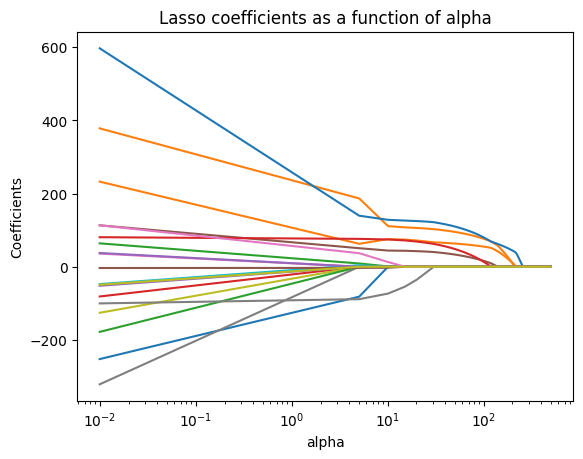

In [36]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');


Moving from left to right in the plot, observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing `alpha`, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for  `alpha`. LassoCV comes with built-in cross-validation. This is how we tune the parameter for regularized regression.
- LassoCV performs cross-validation across a grid of α values, automatically selecting the α that minimizes cross-validation error.

In [38]:
# Create and fit the LassoCV model to the training data with cross-validation

# Create a range of alpha values for LassoCV
alphas = np.logspace(-3, 1, 50)  # From 0.001 to 10 (log scale, 50 points)

# Lasso with 5 fold cross-validation
lasso_cv_model = LassoCV(alphas = alphas, cv=10, max_iter=10000, n_jobs=-1).fit(X_train, y_train)

Let's check the best alpha value.

In [39]:
# Get the best alpha (regularization strength) selected by cross-validation
lasso_cv_model.alpha_

np.float64(4.714866363457389)

**Visualize the coefficients of the LassoCV model**

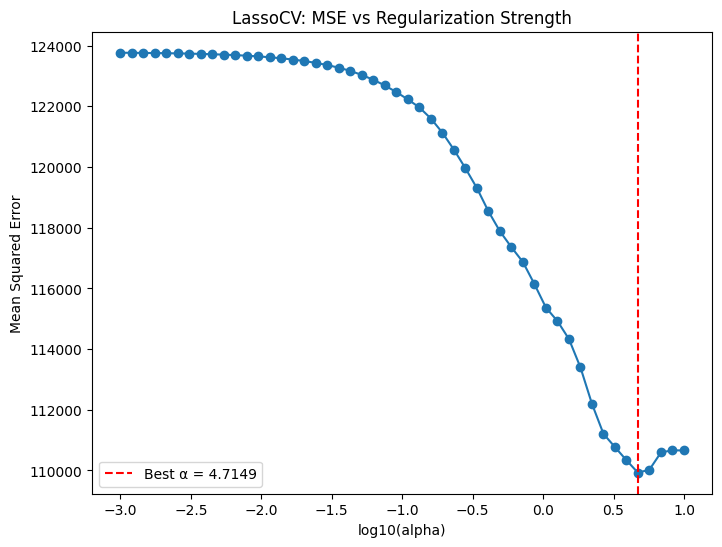

In [40]:
# Get MSEs across alphas
mse_path = lasso_cv_model.mse_path_.mean(axis=1)  # Average MSE across folds
alphas = lasso_cv_model.alphas_

# Plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(alphas), mse_path, marker='o', linestyle='-')
plt.axvline(np.log10(lasso_cv_model.alpha_), color='red', linestyle='--', label=f"Best α = {lasso_cv_model.alpha_:.4f}")
plt.xlabel('log10(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('LassoCV: MSE vs Regularization Strength')
plt.legend()
plt.show()

Let's use the best alpha value, and see if you can tune it.

In [176]:
# Create and fit the Lasso regression model using the best alpha found by cross-validation
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Model Evaluation on Lasso model with the best alpha**

In [177]:
# Training data
pred_train_tuned = lasso_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set post tuning', round(mse_train, 2))
print('R squared training set post tuning', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = lasso_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set post tuning', round(mse_test, 2))
print('R squared test set post tuning', round(r2_score(y_test, pred_test_tuned)*100,2))


MSE training set post tuning 88756.51
R squared training set post tuning 55.15
---------------------------
MSE test set post tuning 142170.22
R squared test set post tuning 34.33


Now, let's find the coefficient of the tuned model.

In [178]:
# Create a Pandas Series of the coefficients from the tuned Lasso regression model
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat          -93.396187
Hits           197.396425
HmRun            9.410992
Runs             0.000000
RBI              0.000000
Walks           51.397542
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           6.919860
CRuns          141.489596
CRBI            58.394806
CWalks          -0.000000
PutOuts         76.242688
Assists          0.000000
Errors          -2.626562
League_N        38.870066
Division_W     -89.361433
NewLeague_N      0.000000
dtype: float64

**Observations**
- Zero Coefficients: Features like Runs, RBI, etc. have coefficients shrunk to zero. This indicates that Lasso has deemed these features less important or irrelevant for predicting the target variable in the presence of other features.

- Non-Zero Coefficients: Features such as Hits, Walks, CRuns, etc. have non-zero coefficients and are considered significant predictors in the model. The magnitude and sign of each coefficient indicate the strength and direction of the influence on the response variable:

Positive Coefficients (e.g., Hits and CRuns) suggest that an increase in these variables is associated with an increase in the target variable.

Negative Coefficients (e.g., AtBat and Division_W) suggest that an increase in these variables is associated with a decrease in the target variable

---

### __Parameter Tuning with Ridge Regression__

**Ridge Regression** also known as L2 Regularization is a regularization technique used in linear regression to prevent overfitting. It is useful for handling multicollinear data, where two predictors/independent variables are highly correlated to each other.

*Collinearity* refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning they have a linear relationship. This correlation makes it difficult to determine the individual effect of each predictor on the target variable, leading to unreliable and unstable estimates of regression coefficients.

Ridge regression adds a regularization term to the loss function that penalizes large coefficients in the model and encourages the model to have smaller coefficients.
It results in a simpler and more generalized model.

Ridge Regression does shrink the coefficients, it does not force them to zero, meaning it does not perform feature selection



Let's see how to implement Ridge regression


- First, import the required libraries.

In [179]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

- Starting the implementation using the train test data acquired from the Lasso implementation on **Hitters.csv** dataset


- Let's fit the model and check what the intercept value is.

In [180]:
# Create and fit the Ridge regression model to the training data
ridge_model = Ridge(alpha=1).fit(X_train, y_train)
ridge_model.intercept_

567.9156813539814

__Observation:__
- The intercept value for the Ridge model is 567.92.

**Model evaluation on Ridge model**


In [181]:
# Training data
pred_train = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = ridge_model.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 84519.55
R squared training set 57.29
---------------------------
MSE test set 128787.82
R squared test set 40.51


Let's check the coefficient of the model.

In [182]:
# Get the coefficients (weights) of the fitted Ridge regression model
ridge_model.coef_

array([-214.36666581,  312.79699189,   44.54460538,  -35.71637884,
        -34.82420084,   96.80224179,   13.90150535, -177.01810375,
         53.88707691,   29.37250046,  316.33678896,   84.98474887,
       -117.4459887 ,   80.97138253,   31.40258773,   -9.94921116,
         96.54151823, -104.45690396,  -38.38032258])

Next, we use cross-validation to find the best value for  `alpha`. Ridge regression just like lasso, comes with built-in cross-validation.

In [183]:
alphas = np.logspace(-3, 3, 50)  # From 0.001 to 1000 (log scale, 50 points)

ridge_cv_model = RidgeCV(alphas= alphas, cv=10).fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
ridge_cv_model.alpha_

323.745754281764

In [184]:
# Get MSEs across alphas (not provided by RidgeCV, so we compute it manually)
alphas = np.logspace(-3, 3, 50)
mean_mse = []

# Iterate over the alphas to compute the mean squared error for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_mse.append(-neg_mse.mean())
    
# Record the best
best_idx = np.argmin(mean_mse)
best_alpha = alphas[best_idx]
best_mse = mean_mse[best_idx]


**Visualize the coefficients of the RidgeCV model**

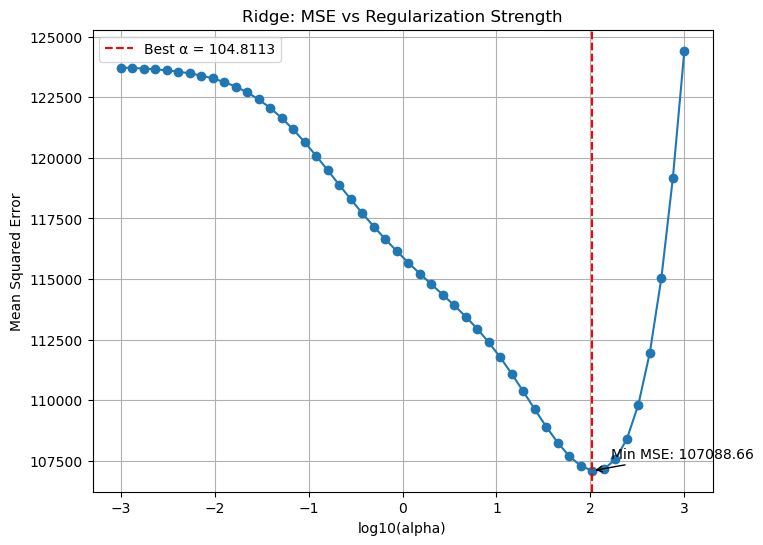

In [185]:
plt.figure(figsize=(8, 6))
plt.plot(np.log10(alphas), mean_mse, marker='o', linestyle='-')

# Mark best alpha
plt.axvline(np.log10(best_alpha), color='red', linestyle='--', label=f"Best α = {best_alpha:.4f}")

# Optionally annotate best MSE
plt.annotate(f"Min MSE: {best_mse:.2f}",
             xy=(np.log10(best_alpha), best_mse),
             xytext=(np.log10(best_alpha)+0.2, best_mse+500),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('log10(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge: MSE vs Regularization Strength')
plt.legend()
plt.grid(True)
plt.show()


In [186]:
# Compare the MSE at specific alpha values
print(f"MSE at 104.81: {mean_mse[np.argmin(abs(alphas - 104.81))]:.2f}")
print(f"MSE at 323.74: {mean_mse[np.argmin(abs(alphas - 323.74))]:.2f}")


MSE at 104.81: 107088.66
MSE at 323.74: 109810.68


In [187]:
# Create and fit the ridge regression model using the best alpha found by cross-validation
ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_, max_iter=10000).fit(X_train, y_train)

**Model evaluation on tuned Ridge model**

In [188]:
# Training data
pred_train_tuned = ridge_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train_tuned)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train_tuned)*100,2))
print("---------------------------")

# Test data
pred_test_tuned = ridge_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test_tuned)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test_tuned)*100,2))


MSE training set 102516.41
R squared training set 48.2
---------------------------
MSE test set 153051.15
R squared test set 29.3


In [189]:
# Create a Pandas Series of the coefficients from the tuned Ridge regression model
pd.Series(ridge_tuned.coef_, index=X_train.columns)

AtBat          22.210847
Hits           34.206180
HmRun          13.325044
Runs           26.265263
RBI            21.076731
Walks          27.924606
Years          17.895491
CAtBat         25.853708
CHits          29.558329
CHmRun         20.994174
CRuns          30.386000
CRBI           27.826768
CWalks         23.507093
PutOuts        36.584064
Assists         3.935249
Errors         -2.709751
League_N        7.285132
Division_W    -16.375742
NewLeague_N     5.568212
dtype: float64

**Observation**

- The coefficients with the highest values suggest that cumulative career statistics like Hits, PutOuts, and CRuns scored historically have the most significant positive influence on the target variable.

- Division_W: The only feature with a notably high negative coefficient is Division_W, which indicates that being in the Western division is associated with a negative effect on the target variable. This could reflect divisional performance differences or disparities in competitive levels.

- Years, Assists, and NewLeague_N: These features have smaller positive coefficients, suggesting a modest but positive influence on the model’s predictions. This indicates that experience and being in a new league might have a slight positive impact.

This analysis helps in understanding the relative importance and influence of different aspects of a baseball player's statistics on the predicted target

---

### __Parameter Tuning With ElasticNet Regression__

Elastic Net regression is a regularization technique that linearly combines the penalties of Lasso (L1) and Ridge (L2) methods. It is particularly useful when dealing with highly collinear data, where ordinary least squares might not perform well.


Let's see how to implement Elastic net regression


- First, import the required libraries.

In [190]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

- Starting the implementation using the train test data acquired from the Lasso implementation on **Hitters.csv** dataset


- Let's fit the model and check what the intercept value is.

In [191]:
# Initializing and fitting the ElasticNet model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization parameter
elastic_net.fit(X_train, y_train)
elastic_net.intercept_

550.3617085410768

__Observation:__
- The intercept value for the ElasticNet model is 550.36.

**Model Evaluation of ElasticNet**

In [192]:
# Training data
pred_train = elastic_net.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = elastic_net.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 95815.18
R squared training set 51.58
---------------------------
MSE test set 150905.14
R squared test set 30.29


In [193]:
# Make predictions on the test set using the fitted Ridge regression model
y_pred = elastic_net.predict(X_test)
mean_squared_error(y_test, y_pred)

print("Root mean Squared Error(RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean Squared Error(RMSE):  388.46510554977965


Let's check the coefficient of the model and the R2 score.

In [194]:
# Get the coefficients (weights) of the fitted Ridge regression model
elastic_net.coef_

array([ 15.97408   ,  52.78863051,   9.01324519,  30.79153659,
        18.40819052,  35.68617146,  16.23936441,  27.75826969,
        38.35995124,  20.56354692,  40.2986028 ,  33.65394714,
        21.61386529,  58.44322336,   5.18968199,  -8.44381039,
        16.97556768, -38.24639185,   9.54578801])

In Elastic Net regression,
- `alpha` controls the overall strength of regularization, with higher values leading to more shrinkage of the coefficients to reduce overfitting.  It's better to use a log scale or more systematic approach to ensure that the alphas tested cover a suitable range, especially since very small or very large values might not be appropriate:

- `l1_ratio` determines the mix of L1 (Lasso) and L2 (Ridge) regularization, ranging from 0 (pure Ridge) to 1 (pure Lasso). Intermediate values blend the two, leveraging Lasso's sparsity and Ridge's ability to handle multicollinearity. Ensure l1_ratio ranges from a small positive number to 1 (but not including 0 if you wish to avoid pure Ridge regression). This parameter is the mix ratio that controls the combination of L1 and L2 regularization

Tuning these parameters allows Elastic Net to balance model performance and interpretability effectively.



In [195]:
# Define the parameter grid for alpha and l1_ratio
alphas = np.logspace(-2, 2, 100)

# start from 0.01 to include L1 regularization
l1_ratios = np.linspace(0.01, 1, 100)

# Create and fit the Elastic Net CV model, using 10-fold cross-validation
elastic_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=10000).fit(X_train, y_train)

In [196]:
best_alpha = elastic_cv_model.alpha_
best_l1_ratio = elastic_cv_model.l1_ratio_
# Print the best alpha and l1_ratio found
print('Best alpha:', best_alpha)
print('Best l1_ratio:', best_l1_ratio)

Best alpha: 0.6579332246575682
Best l1_ratio: 0.01


**Visualize The Coefficients in ElasticNetCV At The Best L1 Ratio**

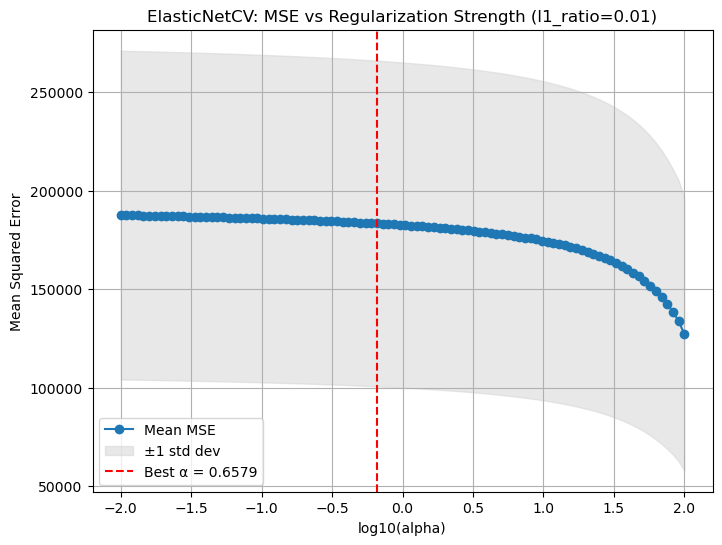

In [197]:
# Find best l1_ratio index
best_l1_idx = np.where(np.isclose(elastic_cv_model.l1_ratio_, l1_ratios))[0][0]

# Extract MSE for that l1_ratio
mean_mse = elastic_cv_model.mse_path_[:, best_l1_idx, :].mean(axis=1)
std_mse = elastic_cv_model.mse_path_[:, best_l1_idx, :].std(axis=1)

# Now plot
plt.figure(figsize=(8,6))
plt.plot(np.log10(alphas), mean_mse, marker='o', linestyle='-', label='Mean MSE')
plt.fill_between(np.log10(alphas),
                 mean_mse - std_mse,
                 mean_mse + std_mse,
                 color='lightgrey', alpha=0.5, label='±1 std dev')

plt.axvline(np.log10(elastic_cv_model.alpha_), color='red', linestyle='--',
            label=f"Best α = {elastic_cv_model.alpha_:.4f}")

plt.xlabel('log10(alpha)')
plt.ylabel('Mean Squared Error')
plt.title(f'ElasticNetCV: MSE vs Regularization Strength (l1_ratio={elastic_cv_model.l1_ratio_:.2f})')
plt.legend()
plt.grid(True)
plt.show()


In [198]:
# Create and fit the Elastic Net regression model using the best alpha and l1_ratio found by cross-validation
elastic_tuned = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000).fit(X_train, y_train)

# Make predictions on the test set using the tuned Elastic Net regression model
y_pred_tuned = elastic_tuned.predict(X_test)

**Evaluate the Tuned ElasticNet Model**

In [199]:
# Calculate and print the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 389.2628624957007


In [200]:
# Training data
pred_train = elastic_tuned.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------")

# Test data
pred_test = elastic_tuned.predict(X_test)
mse_test =mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

MSE training set 96825.96
R squared training set 51.07
---------------------------
MSE test set 151525.58
R squared test set 30.0


In [201]:
# Create a Pandas Series of the coefficients from the tuned Elastic Net regression model
coefficients = pd.Series(elastic_tuned.coef_, index=X_train.columns)
print(coefficients)

AtBat          18.952264
Hits           47.839126
HmRun          10.237971
Runs           30.261344
RBI            19.609824
Walks          34.161751
Years          17.256243
CAtBat         27.894518
CHits          36.334240
CHmRun         20.898924
CRuns          37.842142
CRBI           32.342024
CWalks         22.964286
PutOuts        54.045755
Assists         5.203644
Errors         -7.482882
League_N       14.828009
Division_W    -32.698682
NewLeague_N     9.277949
dtype: float64



## __Model Optimization__

### __Hyperparameter tuning__

- Hyperparameter tuning is the process of finding the best settings for the parameters in a machine-learning model.
- Hyperparameters are settings that are not learned during training but are set before the training process begins.
- Hyperparameter tuning involves trying different combinations of hyperparameters and evaluating the model's performance using validation techniques.

Some common techniques for Hyperparameter tuning are:

1. **Grid Search**: It systematically works through multiple combinations of hyperparameters. It performs an exhaustive search on a specified parameter grid.


  * **How it works:**
    * Define a Parameter Grid: Specify a set of hyperparameters and their possible values.
    * Combination Evaluation: The algorithm evaluates all possible combinations of these hyperparameters.
    * Model Training: For each combination, the model is trained and evaluated using cross-validation.
    * Optimal Parameters: The combination yielding the best performance (e.g., highest accuracy) is chosen as the optimal set.

2. **Random Search:** It explores hyperparameter space by sampling a fixed number of parameter settings from the specified distributions.

* **How it works:**
  * Define Parameter Distributions: Specify distributions or ranges for the hyperparameters.
  * Random Sampling: Randomly sample combinations of hyperparameters from these distributions.
  * Model Training: For each sampled combination, the model is trained and evaluated using cross-validation.
  * Optimal Parameters: The combination yielding the best performance is chosen as the optimal set.

### Implementation of Gridsearch Cross validation technique (using the stored `Hitters.csv` data):

In [202]:
# Import the necessary classes from scikit-learn
from sklearn.model_selection import GridSearchCV

# Create a repeated K-fold cross-validator
cv = RepeatedKFold(n_splits =10, n_repeats =3, random_state =1)

# Define the grid of hyperparameters to search
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)

# Create an instance of the Ridge regression model
model = Ridge()

# Create the GridSearchCV object
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error',cv = cv, n_jobs= -1)

# Fit the GridSearchCV object to the training data
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -243.205
Config: {'alpha': 0.9}


__Observation:__

- As you can see from the output, the Mean Absolute Error is **-243.205**, and the configuration fusion alpha is **0.9**.

>Note: scikit-learn returns negative MAE because scoring functions are designed so that higher = better. We take the negative to interpret MAE as positive.

- Let's try this with alpha points and predict it.

In [203]:
# Fetch the value from the key value pair in the dictionary, results
results.best_params_.get('alpha')

0.9

In [204]:
# Create and fit the Ridge regression model to the training data with the optimal alpha
ridge_model_after_gridcv = Ridge(alpha = results.best_params_.get('alpha')).fit(X_train, y_train)
y_pred_after_gridcv = ridge_model_after_gridcv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_after_gridcv))

358.61325071497754

In [205]:
# Get the r2 score
r2_score(y_test,y_pred_after_gridcv)

0.40592233831910307

__Observation:__
- The r2 score is 0.41. It suggests a moderate fit. The model captures some of the variability in the data but not a large portion.

- Let's check the coefficient of the ridge regression.

In [206]:
# Create a Pandas Series of the coefficients from the fitted Ridge regression model
pd.Series(ridge_model_after_gridcv.coef_, index = X_train.columns)

AtBat         -217.787057
Hits           317.426254
HmRun           45.445885
Runs           -38.135549
RBI            -35.667698
Walks           97.982985
Years           15.223909
CAtBat        -187.544325
CHits           50.727907
CHmRun          27.833344
CRuns          329.466393
CRBI            88.954239
CWalks        -120.935342
PutOuts         80.960981
Assists         31.900486
Errors          -9.600874
League_N        97.931462
Division_W    -104.364617
NewLeague_N    -39.367366
dtype: float64

__Observation:__

- Penalization has occurred, as you can see in the negative values.

---

### __Sklearn Pipelines__

#### __Why sklearn pipelines?__

**Pipelines provide an organized approach to managing your data preprocessing and modeling code. They combine preprocessing and modeling steps into a single, streamlined process.**

 - **Cleaner Code**: Pipelines eliminate the need to manually manage training and validation data at each preprocessing step, reducing clutter and complexity.

 - **Fewer Bugs**: By bundling steps together, pipelines minimize the risk of misapplying or forgetting a preprocessing step.

 - **Easier to Productionize**: Pipelines simplify the transition from a prototype model to a scalable, deployable solution.

**Syntax**:
```python
class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)

```

**Before we start the application, let's pay attention to the following important points**:

 - A pipeline is a sequence of data transformers that can include a final predictor.

 - It lets you apply multiple preprocessing steps to your data in order, and optionally end with a predictor for modeling.

 - Each intermediate step in the pipeline must have fit and transform methods, while the final step only needs fit.

 - You can cache these transformers using the memory argument.

 - The pipeline's main goal is to combine multiple steps that can be cross-validated together and have their parameters adjusted.

 - You can set parameters for any step by using its name followed by a double underscore(__) and the parameter name.

 - You can replace any step's estimator with another estimator or remove a transformer by setting it to 'passthrough' or None.

#### Lets look at the housing data with `Ocean proximity` feature:

In [207]:
housing_data = pd.read_csv("housing_with_ocean_proximity.csv")

In [208]:
housing_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [209]:
# Separate features and target variable
# Assuming 'median_house_value' is the target variable in your dataset
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [210]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)

In [211]:
# Print info to check the structure of the training data
print(X_train.info())
print(X_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 4722 to 7816
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14286 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        162
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64


We're going to treat the `total_bedroom_` differently this time, in order to illustrate how sklearn pipelines work.

#### Implementation for sklearn pipelines


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/Sklearn_pipeline_1.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/Sklearn_pipeline_2.png)

#### We need to perform following preprocessing steps before building the model

1. Missing value treatment - 162 missing values in total_bedrooms(a numeric column)
2. Dummy variable creation for categorical data
3. Standardization of numeric variables

In [212]:
# import StandardScaler for standardization and OneHotEncoder for creating dummy variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# import SimpleImputer for missing value treatment
from sklearn.impute import SimpleImputer

# importing pipeline class. The Pipeline class is used to create a sequence of data processing steps.
from sklearn.pipeline import Pipeline

# importing ColumnTransformer class to apply different preprocessing steps to different subsets of features in your dataset.
from sklearn.compose import ColumnTransformer

**A note about ColumnTransformer**

* ColumnTransformer class allows you to apply different preprocessing steps to different subsets of features in your dataset.
* This is particularly useful when you have a mix of numerical and categorical data that require different types of preprocessing.
* ColumnTransformer ensures that each column or group of columns gets the appropriate transformation before combining the results for further processing or modeling.

### __Data preprocessing starts here:__

In [213]:
# Set up preprocessing steps for numeric and categorical data
housing_cat = X_train.select_dtypes(include='object').columns
housing_num = X_train.select_dtypes(exclude='object').columns

------------------------------------

#### Step 2: Set-up sklearn pipeline for numeric variables. We need to perform missing value imputation and then standardization.

In [214]:
# Numeric variables pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

The num_pipeline is a pipeline that preprocesses numerical data in two steps:

- Imputation: Fills missing values using the median value of each column (SimpleImputer(strategy='median')).
 - Standardization: Scales the data to have a mean of 0 and a standard deviation of 1 (StandardScaler()).

This pipeline ensures consistent and streamlined preprocessing of numerical data.

------------------------------------

#### Step 3: Unified Data Preprocessing with Pipelines and ColumnTransformer

In [215]:
# Unified preprocessing for both numeric and categorical data
preprocessing = ColumnTransformer([
    ('num', num_pipeline, housing_num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), housing_cat)
])

The preprocessing step uses ColumnTransformer to apply different preprocessing pipelines to different types of data in the dataset:

 - Numerical Data: Applies num_pipeline to columns in housing_num, performing imputation and standardization.
 - Categorical Data: Applies OneHotEncoder to columns in housing_cat, converting categorical variables into a one-hot encoded format, ignoring unknown categories.

This ensures that both numerical and categorical data are preprocessed appropriately within a single, unified framework.

------------------------------------

#### Let's check how the pipeline we have created works with the data

In [216]:
# applying preprocessing pipeline to train data
check_train = preprocessing.fit_transform(X_train)

In [217]:
# converting array to dataframe to have a better look at it
check_train_df = pd.DataFrame(check_train)
check_train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.604388,-0.741523,1.536729,-0.620001,-0.716387,-0.790880,-0.721514,0.072853,1.0,0.0,0.0,0.0,0.0
1,0.798753,-0.862998,0.501005,-0.119890,-0.131442,0.218924,-0.043175,0.129574,1.0,0.0,0.0,0.0,0.0
2,-0.845868,1.445014,-1.809456,0.736722,0.333637,0.298266,0.353837,0.825943,0.0,1.0,0.0,0.0,0.0


In [218]:
check_train_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

#### __Observation:__

1. Good to see all the missing values are treated
2. numeric variables are standardised
3. ocean_proximity is converted to dummy variables

------------------------------------

#### Step 4: Building Linear regression model and hyperparameter tuning

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [220]:
# Create an instance of the Ridge regression model
model = Ridge()

In [221]:
# Build a Ridge regression model within a complete pipeline

final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model_ridge', model)
])


In [222]:
# Define the grid of hyperparameters to search

# Note: You can set parameters for any step by using its name followed by a double underscore(__) and the parameter name.

grid = dict()

grid['model_ridge__alpha'] = np.arange(0.1,2.1,0.1)

In [223]:
search = GridSearchCV(estimator = final_pipeline, param_grid = grid, scoring = 'neg_mean_absolute_error',cv = 5, n_jobs= -1)
# Fit the GridSearchCV object to the training data

# Fit GridSearchCV to the training data
results = search.fit(X_train, y_train)
print('MAE: %.3f' % -results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 49789.360
Config: {'model_ridge__alpha': 0.1}


------------------------------------

#### Step 5: Using pipeline object to test the results

In [224]:
# Predict on the test set using the trained model
y_pred = search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 50091.26322372467


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_03/sklearn_pipeline_3.png)

### __Conclusion__

Regression analysis is an essential method for examining and predicting variable relationships. In this lesson, we've delved into core types of regression—simple linear, multiple linear, and polynomial regression.

You've acquired skills to assess model performance using metrics like MSE, RMSE, and R-squared. Furthermore, we explored regularization techniques such as Lasso, Ridge, and ElasticNet to mitigate overfitting, and learned the importance of hyperparameter tuning for optimizing model parameters to enhance results.

In conclusion, this lesson has provided a comprehensive exploration of regression through theoretical insights and hands-on applications.